In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from pandas_profiling import ProfileReport

In [2]:
df=pd.read_csv("sample_data.csv")
df.sample(30)

,Unnamed: 0,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,county,state
21787,69738,7196751348,ft myers / SW florida,3950,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
14627,240831,7194355809,fresno / madera,7995,2013.0,chevrolet,cruze,excellent,4 cylinders,gas,127743.0,clean,automatic,fwd,compact,sedan,silver,NaN,ca
12421,266750,7190216767,sioux falls / SE SD,19998,2013.0,dodge,challenger r/t plus,excellent,8 cylinders,gas,57230.0,clean,automatic,NaN,NaN,NaN,NaN,NaN,sd
7188,8784,7193408230,orlando,4990,2001.0,lexus,rx,excellent,6 cylinders,gas,186721.0,clean,automatic,4wd,NaN,SUV,silver,NaN,fl
22838,13110,7196682084,los angeles,13900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ca
19705,204521,7188972755,tri-cities,10900,2014.0,dodge,grand caravan,NaN,NaN,gas,85265.0,clean,automatic,NaN,NaN,other,white,NaN,tn
10163,296045,7189542673,bellingham,28447,2019.0,ford,edge sel,NaN,4 cylinders,gas,17244.0,clean,automatic,4wd,NaN,SUV,NaN,NaN,wa
19207,363261,7196227104,phoenix,15999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
16427,147665,7196127806,erie,18991,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,pa
13087,378485,7190084103,western massachusetts,43590,2017.0,toyota,tundra crewmax sr5 pickup,good,8 cylinders,other,2428.0,clean,automatic,4wd,NaN,pickup,silver,NaN,ma


In [3]:
#dropping Unnamed:0 and id which are not significant for the analysis
df.drop(["Unnamed: 0","id"],axis=1,inplace=True)

In [4]:
df.sample(frac=0.1)

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,county,state
21053,rockford,12495,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,il
2271,atlanta,1800,2001.0,saturn,vue,NaN,NaN,gas,NaN,salvage,manual,NaN,NaN,NaN,NaN,NaN,ga
321,olympic peninsula,6999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,wa
11049,tucson,5990,2010.0,mazda,3 hatchback,NaN,NaN,gas,121022.0,clean,automatic,NaN,NaN,hatchback,NaN,NaN,az
1574,myrtle beach,4900,2008.0,hyundai,santa fe,good,NaN,gas,NaN,clean,automatic,NaN,NaN,NaN,NaN,NaN,sc
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12314,kalispell,12500,2012.0,subaru,outback,excellent,6 cylinders,gas,101000.0,clean,automatic,4wd,mid-size,SUV,blue,NaN,mt
18162,los angeles,0,2014.0,dodge,challenger,NaN,NaN,gas,93596.0,clean,automatic,NaN,full-size,coupe,NaN,NaN,ca
20474,lima / findlay,3950,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,oh
18369,greenville / upstate,6500,2017.0,hyundai,sonata,NaN,4 cylinders,gas,NaN,salvage,automatic,fwd,mid-size,sedan,white,NaN,sc


In [5]:
df.shape

(25000, 17)

- the dataset consists of 25,000 rows and 17 columns, "price" being the target column.

In [6]:
df.describe()

,price,year,odometer,county
count,2.500000e+04,19372.000000,1.593600e+04,0.0
mean,5.925330e+04,2009.808848,9.999854e+04,NaN
std,6.372920e+06,10.173563,1.226273e+05,NaN
min,0.000000e+00,1900.000000,0.000000e+00,NaN
25%,4.500000e+03,2007.000000,4.432075e+04,NaN
50%,9.995000e+03,2012.000000,9.199500e+04,NaN
75%,1.899100e+04,2016.000000,1.390000e+05,NaN
max,1.000000e+09,2021.000000,9.208483e+06,NaN


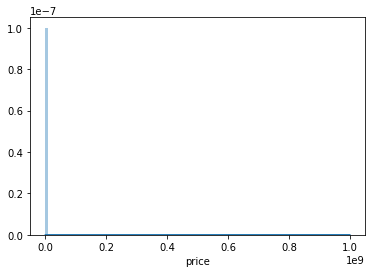

In [7]:
sns.distplot(df["price"],bins=100)

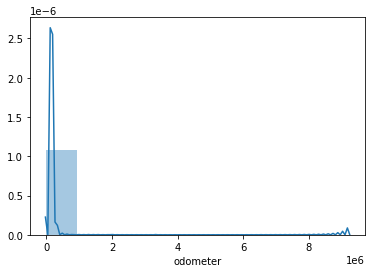

In [8]:
sns.distplot(df["odometer"],bins=10)

- when we see the distribution of numericals columns, we can observe that :
    - price is highly right skewed
    - odometer is also highly right skewed.


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   region        25000 non-null  object 
 1   price         25000 non-null  int64  
 2   year          19372 non-null  float64
 3   manufacturer  18510 non-null  object 
 4   model         19182 non-null  object 
 5   condition     10315 non-null  object 
 6   cylinders     11550 non-null  object 
 7   fuel          19300 non-null  object 
 8   odometer      15936 non-null  float64
 9   title_status  19313 non-null  object 
 10  transmission  19329 non-null  object 
 11  drive         13661 non-null  object 
 12  size          6014 non-null   object 
 13  type          14188 non-null  object 
 14  paint_color   13115 non-null  object 
 15  county        0 non-null      float64
 16  state         25000 non-null  object 
dtypes: float64(3), int64(1), object(13)
memory usage: 3.2+ MB


- except state,region and price, all the columns have null values

In [10]:
df.dtypes

region           object
price             int64
year            float64
manufacturer     object
model            object
condition        object
cylinders        object
fuel             object
odometer        float64
title_status     object
transmission     object
drive            object
size             object
type             object
paint_color      object
county          float64
state            object
dtype: object

### Treating Missing value

In [11]:
df.isnull().sum()

region              0
price               0
year             5628
manufacturer     6490
model            5818
condition       14685
cylinders       13450
fuel             5700
odometer         9064
title_status     5687
transmission     5671
drive           11339
size            18986
type            10812
paint_color     11885
county          25000
state               0
dtype: int64

- year needs to be converted to integer
- we have very few numerical columns such as: **price,odometer, and county**
- categoricals columns- **region, manufactuere,model,condition,cylinders,fuel,titel_status, transmission, drive, size, type, paint_colour,state**

In [12]:
round(100*(df.isnull().sum()/len(df.index)),2)

region            0.00
price             0.00
year             22.51
manufacturer     25.96
model            23.27
condition        58.74
cylinders        53.80
fuel             22.80
odometer         36.26
title_status     22.75
transmission     22.68
drive            45.36
size             75.94
type             43.25
paint_color      47.54
county          100.00
state             0.00
dtype: float64

- **"condition","cylinders","odometer","drive","size","type","paint_color","county"** these attributes have more than 30 % of Nan values.
- which means these attributes do not contribute much information to the dataset and hence can be dropped or eliminated from dataset.
- since by dropping all these attributes the dataset will lose very significant data which may have very good causation with our target variable i.e. "price".
- so we will choose to impute some of the variables which may have significant contribution towards the price and drop some variables which are not very revlevent when we look with the domain perspective.

In [13]:
df.drop("county",axis=1,inplace=True)

- we are dropping "county", because 100% of the data is Nan, and missing

In [14]:
df.shape

(25000, 16)

- so we are remaining with 16 columns and 25000 rows

In [15]:
df[df.isnull().sum(axis=1)>10]

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state
5,atlanta,18990,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ga
6,"st louis, MO",8500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,il
10,atlanta,7995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ga
13,new hampshire,12900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nh
14,daytona beach,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24984,phoenix,500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
24985,lynchburg,18995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,va
24992,indianapolis,19750,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,in
24997,dallas / fort worth,1300,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tx


In [16]:
(10/16)*100

62.5

- almost 5571 rows have more than 10 nan values i.e. more than 62.5% of the dataset is missing, which means these rows do not contribute much to the dataset and to find patterns in the dataset.
- so better option is to drop these rows

In [17]:
df=df[df.isnull().sum(axis=1)<10]
df.reset_index(drop="index",inplace=True)

- dropping the rows with more than 62.5 % of issing values 

In [18]:
df.shape

(19414, 16)

- we remain with 19,414 rows and 16 columns

In [19]:
df.sample(30)

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state
12406,albuquerque,8750,2015.0,ford,focus se hatchback,good,4 cylinders,gas,64200.0,clean,automatic,fwd,NaN,hatchback,silver,nm
9777,orlando,9941,2014.0,honda,accord,NaN,4 cylinders,gas,123810.0,clean,automatic,fwd,mid-size,sedan,custom,fl
4782,stockton,15990,2012.0,jeep,grand cherokee laredo sport,good,6 cylinders,gas,82094.0,clean,other,NaN,NaN,SUV,black,ca
14375,jacksonville,1000,2000.0,honda,cr-v,good,4 cylinders,gas,NaN,clean,automatic,4wd,NaN,truck,green,fl
14598,lehigh valley,4200,2002.0,ford,taurus,NaN,NaN,gas,41700.0,clean,automatic,NaN,NaN,NaN,NaN,pa
5700,baltimore,53499,NaN,NaN,olet Silverado 3500HD,NaN,8 cylinders,diesel,25536.0,clean,automatic,4wd,NaN,pickup,white,md
236,waterloo / cedar falls,3000,2003.0,lincoln,ls,excellent,6 cylinders,gas,148234.0,clean,automatic,rwd,NaN,sedan,NaN,ia
18574,anchorage / mat-su,499,2011.0,ford,f-150,NaN,8 cylinders,gas,166158.0,clean,automatic,4wd,NaN,truck,NaN,ak
11881,columbus,7995,2005.0,toyota,camry le,like new,4 cylinders,gas,54000.0,clean,automatic,fwd,mid-size,sedan,yellow,oh
13253,topeka,1999,1994.0,ford,f-150,good,8 cylinders,gas,120000.0,clean,manual,4wd,full-size,truck,blue,ks


In [20]:
df["drive"].unique()

array(['fwd', '4wd', nan, 'rwd'], dtype=object)

In [21]:
round(100*(df.isnull().sum()/len(df.index)),2)

region           0.00
price            0.00
year             0.29
manufacturer     4.73
model            1.27
condition       46.87
cylinders       40.51
fuel             0.59
odometer        17.91
title_status     0.52
transmission     0.44
drive           29.63
size            69.02
type            26.92
paint_color     32.45
state            0.00
dtype: float64

## Missing value Imputation

In [22]:
df["year"].fillna(df["year"].mode()[0],inplace=True)

- imputing year with the most frequent value.

In [23]:
df["used_years"]=2021-df["year"]

- added a new column **"used_years"** which gives the total number of years the car has been in used since the year of purchase of car.

In [24]:
df["manufacturer"].fillna(method="ffill",axis=0,inplace=True)

- Imputing the manufacturer with the front fill, because imputing with mode will add biasness to the variable.

### For imputing model, we will groupby Manufacturer and take mean of the model and fill it

In [25]:
df["model"]=df.groupby(["manufacturer"])["model"].transform(lambda x: x.fillna(x.mode()[0]))

- imputing the "model" based on the most frequent car models available in the dataset by the particular "manufacturer".

In [26]:
df["type"].unique()

array(['other', 'SUV', 'coupe', nan, 'truck', 'pickup', 'sedan',
       'mini-van', 'hatchback', 'wagon', 'convertible', 'van', 'offroad',
       'bus'], dtype=object)

In [27]:
df["type"]=df.groupby(["manufacturer"])["type"].transform(lambda x: x.fillna(x.mode()[0]))

- imputing the "type" of the car based on the most frequent car types available in the dataset by the particular "manufacturer".

In [28]:
df["cylinders"]=df.groupby(["type"])["cylinders"].transform(lambda x: x.fillna(x.mode()[0]))

- imputing "cylinders", with the mode of the cylinders of individual type, imputing based on type of the car.

In [29]:
df["fuel"]=df.groupby(["type"])["fuel"].transform(lambda x: x.fillna(x.mode()[0]))

-  imputing "fuel", with the mode of the variable "fuel" of individual "type", (imputing based on type of the car).

In [30]:
df["drive"].fillna(method="bfill",axis=0,inplace=True)

- imputing "drive" using back fill method, because cannot be imputeted with dependency on other variable, and imputing with mode will cause huge bias to the variable

In [31]:
df["odometer"]=df.groupby(["type","used_years"])["odometer"].transform(lambda x: x.fillna(round(x.mean(),2)))

- imputing "odometer", based on the type of the car and numbers of years used,since it is easy to identify or recognise the odometer value based on number of years used.

In [32]:
round(100*(df.isnull().sum()/df.shape[0]),2)

region           0.00
price            0.00
year             0.00
manufacturer     0.00
model            0.00
condition       46.87
cylinders        0.00
fuel             0.00
odometer         0.85
title_status     0.52
transmission     0.44
drive            0.00
size            69.02
type             0.00
paint_color     32.45
state            0.00
used_years       0.00
dtype: float64

- despite imputing odometer with the mean of the number of years used i.e. "used_years", we still have few Nan values which will not be releb=vent to to imputed individually based on just the mean or median of the variable "odometer", because odometer is highly skewed and has outliers,
- so let's drop the remaing Nan values form variable "odometer"

In [33]:
df["odometer"]

0         73434.00
1        128530.00
2         63465.00
3        118751.06
4         76300.00
           ...    
19409    107924.72
19410     50000.00
19411    205569.00
19412     85824.56
19413     14050.00
Name: odometer, Length: 19414, dtype: float64

In [34]:
df.dropna(subset=["odometer"],inplace=True)

In [35]:
df.isnull().sum()

region              0
price               0
year                0
manufacturer        0
model               0
condition        9032
cylinders           0
fuel                0
odometer            0
title_status      101
transmission       85
drive               0
size            13282
type                0
paint_color      6213
state               0
used_years          0
dtype: int64

In [36]:
df.shape

(19249, 17)

- after performing some imputations and treating missing values , we reamin with 19,249 rows and 17 columns

In [37]:
df["transmission"]=df.groupby(["manufacturer"])["transmission"].transform(lambda x: x.fillna(x.mode()[0]))

- imputing "transmission" with the most_frequent trasmission type of the individual "manufacturer"

In [38]:
df["title_status"].fillna(df["title_status"].mode()[0],inplace=True)

In [39]:
df.isnull().sum()

region              0
price               0
year                0
manufacturer        0
model               0
condition        9032
cylinders           0
fuel                0
odometer            0
title_status        0
transmission        0
drive               0
size            13282
type                0
paint_color      6213
state               0
used_years          0
dtype: int64

In [40]:
df["condition"]=df.groupby(["title_status"])["condition"].transform(lambda x: x.fillna(x.mode()[0]))

- imputing "condition ", based on the "title_status"

In [41]:
df.isnull().sum()

region              0
price               0
year                0
manufacturer        0
model               0
condition           0
cylinders           0
fuel                0
odometer            0
title_status        0
transmission        0
drive               0
size            13282
type                0
paint_color      6213
state               0
used_years          0
dtype: int64

In [42]:
round(100*(df.isnull().sum()/len(df.index)),2)

region           0.00
price            0.00
year             0.00
manufacturer     0.00
model            0.00
condition        0.00
cylinders        0.00
fuel             0.00
odometer         0.00
title_status     0.00
transmission     0.00
drive            0.00
size            69.00
type             0.00
paint_color     32.28
state            0.00
used_years       0.00
dtype: float64

- remaining with 2 variables, which are not very significant, and have more than 30% of Nan values
- dropping the variables "size" and "paint_color"

In [43]:
df.drop(["size","paint_color"],axis=1,inplace=True)

In [44]:
df.shape

(19249, 15)

- after performing the missing value treatment we remain with **19,249 rows and 15 columns**

In [45]:
df.isnull().sum()

region          0
price           0
year            0
manufacturer    0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
title_status    0
transmission    0
drive           0
type            0
state           0
used_years      0
dtype: int64

In [46]:
df["year"]=df["year"].astype("int64")

In [47]:
df["used_years"]=df["used_years"].astype("int64")

- **type_casting** 'year" and "used_year" from float to int

In [48]:
df.dtypes

region           object
price             int64
year              int64
manufacturer     object
model            object
condition        object
cylinders        object
fuel             object
odometer        float64
title_status     object
transmission     object
drive            object
type             object
state            object
used_years        int64
dtype: object

In [49]:
df[df["price"]==0]

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,state,used_years
0,detroit metro,0,2011,gmc,terrain slt-1,good,4 cylinders,other,73434.0,clean,automatic,fwd,other,mi,10
7,twin falls,0,2015,ford,f-350 super duty long bed,excellent,8 cylinders,diesel,166315.0,clean,automatic,4wd,truck,id,6
16,fredericksburg,0,2017,ford,f-250 super duty,excellent,8 cylinders,gas,108008.0,clean,automatic,4wd,truck,va,4
17,rhode island,0,2011,audi,s5,excellent,8 cylinders,gas,103059.0,clean,manual,4wd,coupe,ri,10
24,greensboro,0,2016,honda,accord,excellent,4 cylinders,gas,44369.0,clean,automatic,fwd,sedan,nc,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19375,lynchburg,0,2013,honda,crosstour,excellent,6 cylinders,gas,77658.0,clean,automatic,fwd,wagon,va,8
19392,danville,0,2013,volkswagen,passat,excellent,4 cylinders,diesel,64287.0,clean,automatic,fwd,sedan,va,8
19394,springfield,0,2017,ford,f-150,good,6 cylinders,other,27850.0,clean,automatic,4wd,pickup,il,4
19402,oklahoma city,0,2015,gmc,sierra,excellent,8 cylinders,other,99534.0,clean,automatic,4wd,pickup,ok,6


In [50]:
df

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,state,used_years
0,detroit metro,0,2011,gmc,terrain slt-1,good,4 cylinders,other,73434.00,clean,automatic,fwd,other,mi,10
1,grand forks,14990,2013,ford,explorer limited,excellent,6 cylinders,gas,128530.00,clean,automatic,4wd,SUV,nd,8
2,new haven,16990,2013,honda,accord ex-l coupe 2d,good,6 cylinders,gas,63465.00,clean,other,fwd,coupe,ct,8
3,oklahoma city,19500,2013,ford,f-150 lariat,like new,8 cylinders,gas,118751.06,clean,automatic,4wd,truck,ok,8
4,treasure coast,1000,1992,ford,junk,new,8 cylinders,other,76300.00,clean,other,rwd,truck,fl,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19409,northern michigan,7000,2012,chrysler,town and country,excellent,4 cylinders,gas,107924.72,lien,automatic,4wd,sedan,mi,9
19410,lexington,16600,2017,nissan,frontier crew cab,like new,6 cylinders,gas,50000.00,rebuilt,automatic,4wd,truck,ky,4
19411,flint,4995,2012,chevrolet,cruze,excellent,6 cylinders,gas,205569.00,clean,automatic,4wd,SUV,mi,9
19412,des moines,42380,2015,chevrolet,silverado 3500hd,excellent,6 cylinders,diesel,85824.56,clean,automatic,4wd,SUV,ia,6


- we can see that price has 0 value whichis not relevant for the data, so let's check the column price with 0 value

In [51]:
df["price"].where(df["price"]!=0,round(df["price"].median(),2),inplace=True)

- replacing the "price" where, value is "0" with median of "price"

In [52]:
df

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,state,used_years
0,detroit metro,9998,2011,gmc,terrain slt-1,good,4 cylinders,other,73434.00,clean,automatic,fwd,other,mi,10
1,grand forks,14990,2013,ford,explorer limited,excellent,6 cylinders,gas,128530.00,clean,automatic,4wd,SUV,nd,8
2,new haven,16990,2013,honda,accord ex-l coupe 2d,good,6 cylinders,gas,63465.00,clean,other,fwd,coupe,ct,8
3,oklahoma city,19500,2013,ford,f-150 lariat,like new,8 cylinders,gas,118751.06,clean,automatic,4wd,truck,ok,8
4,treasure coast,1000,1992,ford,junk,new,8 cylinders,other,76300.00,clean,other,rwd,truck,fl,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19409,northern michigan,7000,2012,chrysler,town and country,excellent,4 cylinders,gas,107924.72,lien,automatic,4wd,sedan,mi,9
19410,lexington,16600,2017,nissan,frontier crew cab,like new,6 cylinders,gas,50000.00,rebuilt,automatic,4wd,truck,ky,4
19411,flint,4995,2012,chevrolet,cruze,excellent,6 cylinders,gas,205569.00,clean,automatic,4wd,SUV,mi,9
19412,des moines,42380,2015,chevrolet,silverado 3500hd,excellent,6 cylinders,diesel,85824.56,clean,automatic,4wd,SUV,ia,6


### Uni_variate Analysis

In [53]:
df.sample(30).style.highlight_max(color='orange').highlight_min(color='yellow')

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,state,used_years
3710,lexington,21990,2014,ford,mustang gt coupe 2d,good,8 cylinders,gas,92553.000000,clean,other,rwd,coupe,ky,7
16350,jonesboro,52900,2017,dodge,challenger,excellent,8 cylinders,gas,35994.000000,clean,automatic,rwd,coupe,ar,4
14469,valdosta,3699,2005,kia,sorento ex,excellent,6 cylinders,gas,122650.000000,clean,automatic,fwd,sedan,ga,16
16893,birmingham,20988,2019,nissan,kicks,excellent,4 cylinders,gas,12596.000000,clean,automatic,fwd,sedan,al,2
8535,new orleans,27500,1968,chevrolet,chevelle,excellent,6 cylinders,gas,42141.000000,clean,automatic,fwd,SUV,la,53
11334,medford-ashland,27997,2017,gmc,acadia slt-1,excellent,6 cylinders,gas,54093.000000,clean,automatic,4wd,SUV,or,4
7430,madison,21990,2017,nissan,murano sv sport utility,good,6 cylinders,gas,28260.000000,clean,automatic,fwd,SUV,wi,4
16971,charleston,4500,2008,toyota,camry,excellent,4 cylinders,gas,139881.840000,clean,automatic,fwd,sedan,sc,13
6087,san diego,22900,2016,ford,explorer,excellent,6 cylinders,gas,54322.000000,clean,automatic,fwd,SUV,ca,5
1505,grand rapids,7000,1987,chevrolet,blazer k5,excellent,6 cylinders,diesel,89741.200000,clean,automatic,4wd,SUV,mi,34


In [54]:
df

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,state,used_years
0,detroit metro,9998,2011,gmc,terrain slt-1,good,4 cylinders,other,73434.00,clean,automatic,fwd,other,mi,10
1,grand forks,14990,2013,ford,explorer limited,excellent,6 cylinders,gas,128530.00,clean,automatic,4wd,SUV,nd,8
2,new haven,16990,2013,honda,accord ex-l coupe 2d,good,6 cylinders,gas,63465.00,clean,other,fwd,coupe,ct,8
3,oklahoma city,19500,2013,ford,f-150 lariat,like new,8 cylinders,gas,118751.06,clean,automatic,4wd,truck,ok,8
4,treasure coast,1000,1992,ford,junk,new,8 cylinders,other,76300.00,clean,other,rwd,truck,fl,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19409,northern michigan,7000,2012,chrysler,town and country,excellent,4 cylinders,gas,107924.72,lien,automatic,4wd,sedan,mi,9
19410,lexington,16600,2017,nissan,frontier crew cab,like new,6 cylinders,gas,50000.00,rebuilt,automatic,4wd,truck,ky,4
19411,flint,4995,2012,chevrolet,cruze,excellent,6 cylinders,gas,205569.00,clean,automatic,4wd,SUV,mi,9
19412,des moines,42380,2015,chevrolet,silverado 3500hd,excellent,6 cylinders,diesel,85824.56,clean,automatic,4wd,SUV,ia,6


## Uni-Variate Analysis

In [55]:
df.columns

Index(['region', 'price', 'year', 'manufacturer', 'model', 'condition',
       'cylinders', 'fuel', 'odometer', 'title_status', 'transmission',
       'drive', 'type', 'state', 'used_years'],
      dtype='object')

### Price

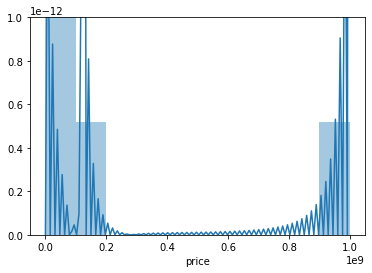

In [56]:
sns.distplot(df["price"],bins=10)

- price is slightly skewed towards right

In [57]:
df["price"].max()

999999999

In [58]:
df[df["price"]==999999999]

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,state,used_years
18122,greenville / upstate,999999999,1951,subaru,hudson commodore,excellent,8 cylinders,gas,40000.0,clean,manual,fwd,SUV,sc,70


- the most expensive car in the given data is "hudson commodore" manufactured by "subaru", which is used for 70 years, qand is manual car.
- meaning, the reason for high cost could be because of being a "vintage" or antic car


In [59]:
df["price"].min()

1

In [60]:
len(df[df["price"]==1])

55

In [61]:
df[df["price"]==1]

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,state,used_years
450,buffalo,1,1997,ford,suzuki sidekick,excellent,4 cylinders,gas,187941.25,rebuilt,automatic,4wd,SUV,ny,24
1615,omaha / council bluffs,1,2011,chevrolet,silverado 2500hd,excellent,6 cylinders,gas,128724.68,clean,automatic,4wd,SUV,ia,10
1863,new orleans,1,2010,cadillac,-,excellent,6 cylinders,gas,0.00,clean,automatic,fwd,sedan,la,11
1898,"washington, DC",1,2014,jeep,.,excellent,6 cylinders,gas,97276.90,clean,automatic,4wd,SUV,dc,7
2883,albany,1,2010,ford,-,excellent,6 cylinders,gas,0.00,clean,automatic,fwd,truck,ny,11
3229,ventura county,1,1995,chevrolet,s10,excellent,6 cylinders,gas,137213.25,lien,manual,rwd,SUV,ca,26
3457,boston,1,2019,ford,wheelchair handicap van,excellent,8 cylinders,gas,19480.41,clean,automatic,4wd,truck,ma,2
3813,eastern kentucky,1,2008,jeep,wrangler,excellent,6 cylinders,gas,130000.00,clean,automatic,4wd,SUV,ky,13
4302,long island,1,2015,lincoln,Isuzu Npr,excellent,4 cylinders,diesel,78700.77,clean,automatic,4wd,sedan,ny,6
4589,tyler / east TX,1,2004,honda,accord,good,6 cylinders,gas,144749.75,clean,automatic,fwd,sedan,tx,17


- there are 55 cars with the minimum price in the dataset, from various brands and manufacturer with various specifications

## year

In [62]:
df["year"].max()

2021

In [63]:
df[df["year"]==2021]

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,state,used_years
621,janesville,37,2021,toyota,Janesville,excellent,4 cylinders,gas,0.00,clean,automatic,fwd,sedan,wi,0
960,springfield,22450,2021,chevrolet,trax,excellent,6 cylinders,gas,4.00,clean,automatic,fwd,SUV,mo,0
1947,chicago,1650,2021,nissan,altima 2.5 sl,good,4 cylinders,gas,0.00,clean,automatic,fwd,sedan,il,0
2800,little rock,21999,2021,chevrolet,trax,excellent,6 cylinders,gas,8.00,clean,automatic,fwd,SUV,ar,0
4818,vermont,44000,2021,kia,telluride,new,6 cylinders,gas,515.25,clean,automatic,rwd,SUV,vt,0
8547,greenville / upstate,22949,2021,toyota,corolla,new,4 cylinders,gas,0.00,clean,automatic,fwd,sedan,sc,0
10531,sarasota-bradenton,200,2021,nissan,all,good,4 cylinders,other,0.00,missing,other,4wd,sedan,fl,0
15118,maine,9998,2021,jeep,VW-Kia-Hyundai-Dodge-Subaru,excellent,6 cylinders,other,515.25,clean,other,4wd,SUV,me,0
15680,"st louis, MO",21788,2021,chevrolet,trax,excellent,6 cylinders,gas,1949.00,clean,automatic,fwd,SUV,il,0
16886,northern michigan,23502,2021,chevrolet,trailblazer,excellent,3 cylinders,gas,100.00,clean,automatic,fwd,SUV,mi,0


In [64]:
len(df[df["year"]==2021])

10

- There are 10 latest cars which have been used for less than 1 year have travelled for approximately less than 2000 km, all being in good condition.

In [65]:
df[df["year"]==df["year"].min()]

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,state,used_years
4643,bend,12500,1919,ford,depot,excellent,8 cylinders,gas,100.0,clean,manual,4wd,truck,or,102


- the most vintage car is **"depot"** was manufactured in **1919** by ford and has run for 100 km 

### manufacturer

Text(0, 0.5, 'Count')

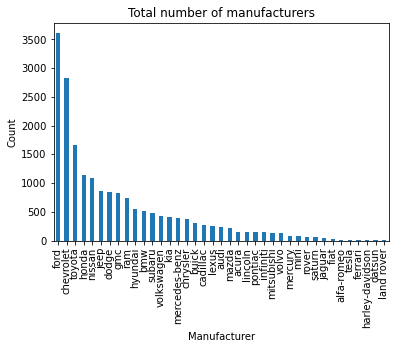

In [66]:
df['manufacturer'].value_counts().plot.bar()
plt.title('Total number of manufacturers')
plt.xlabel('Manufacturer')
plt.ylabel('Count')

- ford and chevrolet has the highest number of used cars 
- land rover,datsun,harley_davidson has the least

### model 

In [67]:
len(df['model'].value_counts())

5089

In [68]:
df['model'].value_counts()

f-150                       364
silverado 1500              256
1500                        220
escape                      188
camry                       181
                           ... 
camry fwd 4-door              1
wrangler unlimited x 4x4      1
1500 club coupe               1
356 Speedster                 1
G                             1
Name: model, Length: 5089, dtype: int64

In [69]:
df[df["model"]=="f-150"]["manufacturer"]

41       ford
142      ford
148      ford
223      ford
233      ford
         ... 
19123    ford
19165    ford
19178    ford
19214    ford
19394    ford
Name: manufacturer, Length: 364, dtype: object

In [70]:
df[df["model"]=="silverado 1500"]["manufacturer"]

310      chevrolet
313      chevrolet
373      chevrolet
379      chevrolet
592      chevrolet
           ...    
18642    chevrolet
18975    chevrolet
19025    chevrolet
19179    chevrolet
19217    chevrolet
Name: manufacturer, Length: 256, dtype: object

In [71]:
df['model'].value_counts()[0:20]

f-150             364
silverado 1500    256
1500              220
escape            188
camry             181
accord            166
altima            163
explorer          161
grand cherokee    147
silverado         145
grand caravan     138
fusion            133
civic             128
mustang           126
equinox           123
2500              119
corolla           119
wrangler          110
tacoma            105
cr-v              105
Name: model, dtype: int64

Text(0, 0.5, 'Count')

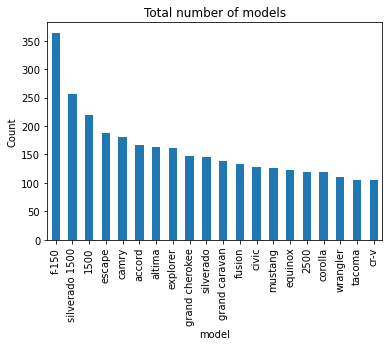

In [72]:
df['model'].value_counts()[0:20].plot.bar()
plt.title('Total number of models')
plt.xlabel('model')
plt.ylabel('Count')


- there are total of 19414 cars which consists of **5167** specific/ unique model cars
- The most available reused car model is **f-50**, manufactured by **"ford"** followed by **"silverado 1500"**, manufactured by **chevrolet**. 

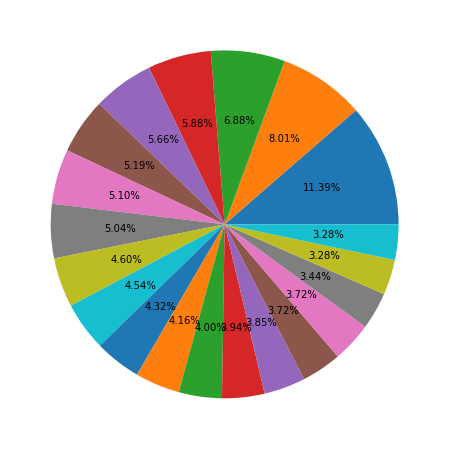

In [73]:
plt.figure(figsize=(10,8))
values= df["model"].value_counts()[:20]
labels=["f-150","silverado 1500","1500","escape","camry","accord","altima","explorer","grand cherokee","silverado","grand caravan","fusion","civic","mustang","equinox","corolla","2500","wrangler","tacoma","impala"]

plt.pie(values,autopct='%0.2f%%')
plt.show()

## Condition

In [74]:
df["condition"].unique()

array(['good', 'excellent', 'like new', 'new', 'fair', 'salvage'],
      dtype=object)

In [75]:
df["condition"].nunique()

6

In [76]:
df["condition"].value_counts()

excellent    13867
good          3892
like new      1040
fair           372
new             48
salvage         30
Name: condition, dtype: int64

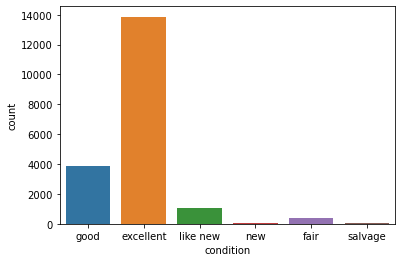

In [77]:
sns.countplot(x="condition",data=df)

In [78]:
df.shape

(19249, 15)

- most of the cars in the dataset are in excellent condition, and very few are new and salvage 
- out of 19,249 there are 13,867 cars in excellent condition

## Cylinders

In [79]:
df["cylinders"].unique()

array(['4 cylinders', '6 cylinders', '8 cylinders', '10 cylinders',
       '5 cylinders', 'other', '12 cylinders', '3 cylinders'],
      dtype=object)

In [80]:
df["cylinders"].value_counts()

4 cylinders     7013
6 cylinders     6994
8 cylinders     5046
5 cylinders       74
10 cylinders      54
other             36
3 cylinders       23
12 cylinders       9
Name: cylinders, dtype: int64

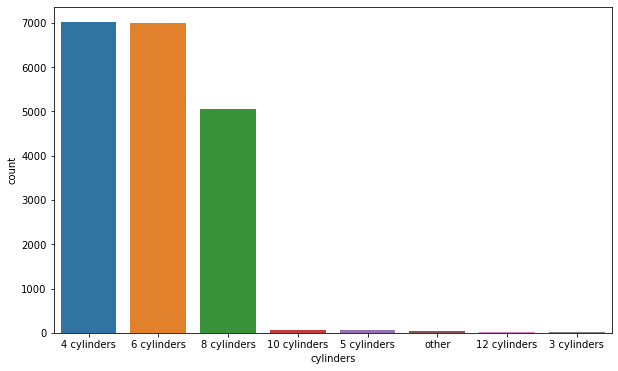

In [81]:
plt.figure(figsize=(10,6))
sns.countplot(x="cylinders",data=df)

- most of the cars in the dataset consists of cars with 4 cylinders
- very few cars have 12 cylinders

In [82]:
df[df["cylinders"]=="12 cylinders"]

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,state,used_years
875,cleveland,110000,2011,toyota,Rolls-Royce Ghost,excellent,12 cylinders,gas,21414.0,clean,automatic,rwd,sedan,oh,10
7304,fargo / moorhead,12000,1987,jaguar,xjs v12,excellent,12 cylinders,gas,34455.0,clean,automatic,fwd,sedan,mn,34
8269,chattanooga,54950,2008,bmw,BENTLEY CONTINENTAL GTC,like new,12 cylinders,gas,41088.0,clean,automatic,4wd,convertible,tn,13
8508,palm springs,177999,2016,chevrolet,Rolls-Royce Wraith LOW MILES,excellent,12 cylinders,gas,25000.0,clean,automatic,4wd,coupe,ca,5
10994,denver,44995,2005,jeep,Bentley Continental GT,excellent,12 cylinders,gas,51269.0,clean,automatic,4wd,coupe,co,16
11299,charlotte,17000,1993,mercedes-benz,benz s600 600 sel,like new,12 cylinders,gas,48000.0,clean,automatic,rwd,sedan,nc,28
11759,baltimore,39995,2004,ford,bentley continental gt,like new,12 cylinders,gas,68415.0,clean,automatic,4wd,coupe,md,17
18502,appleton-oshkosh-FDL,13500,2002,mercedes-benz,cl600,excellent,12 cylinders,gas,70000.0,clean,automatic,rwd,coupe,wi,19
18938,ventura county,9800,1997,mercedes-benz,benz 600,excellent,12 cylinders,gas,172000.0,clean,automatic,rwd,coupe,ca,24


- cars with 12 cylinders have comparable higher prices

In [83]:
df.columns

Index(['region', 'price', 'year', 'manufacturer', 'model', 'condition',
       'cylinders', 'fuel', 'odometer', 'title_status', 'transmission',
       'drive', 'type', 'state', 'used_years'],
      dtype='object')

## fuel

In [84]:
df["fuel"].unique()

array(['other', 'gas', 'diesel', 'hybrid', 'electric'], dtype=object)

In [85]:
df["fuel"].value_counts()

gas         16901
diesel       1415
other         632
hybrid        235
electric       66
Name: fuel, dtype: int64

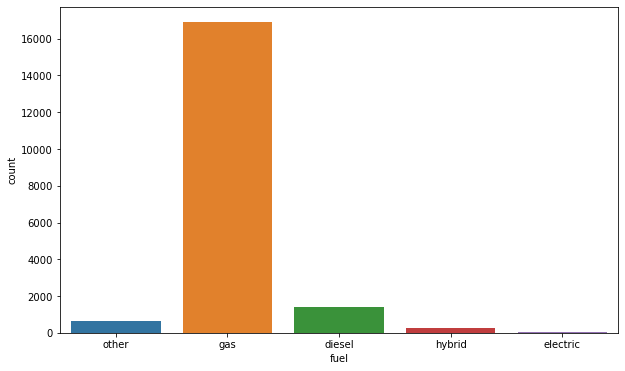

In [86]:
plt.figure(figsize=(10,6))
sns.countplot("fuel", data=df)

- most of the cars in the dataset are the one which run on  **"gas"** ( fuel type) 
- very few cars are **electric** type

In [87]:
df.columns

Index(['region', 'price', 'year', 'manufacturer', 'model', 'condition',
       'cylinders', 'fuel', 'odometer', 'title_status', 'transmission',
       'drive', 'type', 'state', 'used_years'],
      dtype='object')

## odometer

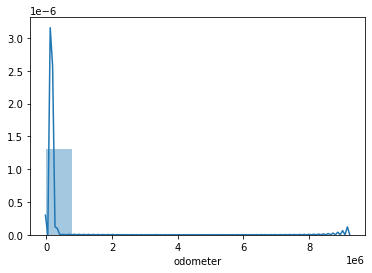

In [88]:
sns.distplot(df["odometer"],bins=12)

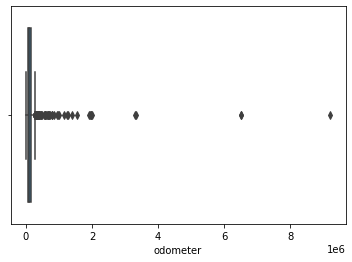

In [89]:
sns.boxplot(x="odometer",data=df)

In [90]:
df["odometer"].max()

9208483.0

In [91]:
df["odometer"].min()

0.0

In [92]:
df[df["odometer"]==df["odometer"].max()]

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,state,used_years
10238,el paso,7500,2011,ford,ranger,good,6 cylinders,gas,9208483.0,clean,automatic,4wd,truck,tx,10


In [93]:
df[df["odometer"]==df["odometer"].min()]

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,state,used_years
150,bozeman,9998,2015,dodge,intern,excellent,6 cylinders,diesel,0.0,clean,other,4wd,other,mt,6
391,cleveland,9998,2015,dodge,i,excellent,6 cylinders,diesel,0.0,clean,other,fwd,other,oh,6
621,janesville,37,2021,toyota,Janesville,excellent,4 cylinders,gas,0.0,clean,automatic,fwd,sedan,wi,0
1253,birmingham,9998,2019,chevrolet,Biz On Wheels,excellent,6 cylinders,gas,0.0,clean,automatic,fwd,SUV,al,2
1811,saginaw-midland-baycity,9998,2015,dodge,intern,excellent,6 cylinders,diesel,0.0,clean,other,fwd,other,mi,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18603,athens,2900,1979,mercedes-benz,benz 450 sl,good,8 cylinders,gas,0.0,clean,automatic,rwd,sedan,ga,42
18792,tallahassee,4995,2003,ford,f-150,good,8 cylinders,gas,0.0,clean,automatic,rwd,truck,fl,18
18796,atlanta,9998,2008,honda,accord sedan,excellent,4 cylinders,gas,0.0,clean,automatic,fwd,sedan,ga,13
18942,ann arbor,20900,2017,ford,e-450,excellent,6 cylinders,gas,0.0,clean,other,rwd,other,mi,4


- there are 116 cars which have 0 odometer , meaning they have not run on road

In [94]:
df.columns

Index(['region', 'price', 'year', 'manufacturer', 'model', 'condition',
       'cylinders', 'fuel', 'odometer', 'title_status', 'transmission',
       'drive', 'type', 'state', 'used_years'],
      dtype='object')

### Bi_variate analysis

In [95]:
df["region"].unique()

array(['detroit metro', 'grand forks', 'new haven', 'oklahoma city',
       'treasure coast', 'long island', 'twin falls', 'central NJ',
       'northern michigan', 'fargo / moorhead', 'knoxville',
       'anchorage / mat-su', 'sarasota-bradenton', 'fredericksburg',
       'rhode island', 'bend', 'las vegas', 'rochester',
       'kansas city, MO', 'indianapolis', 'jacksonville', 'greensboro',
       'daytona beach', 'gulfport / biloxi', 'huntsville / decatur',
       'lancaster', 'tucson', 'roanoke', 'birmingham', 'reno / tahoe',
       'atlanta', 'springfield', 'savannah / hinesville',
       'scranton / wilkes-barre', 'louisville', 'orlando', 'vermont',
       'the thumb', 'tyler / east TX', 'bozeman', 'ocala', 'bellingham',
       'baton rouge', 'lincoln', 'missoula', 'hartford', 'philadelphia',
       'yuma', 'western massachusetts', 'nashville', 'modesto',
       'southeast missouri', 'mobile', 'charlottesville',
       'medford-ashland', 'ventura county', 'east idaho', 'bakersfie

In [96]:
df.columns

Index(['region', 'price', 'year', 'manufacturer', 'model', 'condition',
       'cylinders', 'fuel', 'odometer', 'title_status', 'transmission',
       'drive', 'type', 'state', 'used_years'],
      dtype='object')

In [97]:
df["manufacturer"].nunique()

39

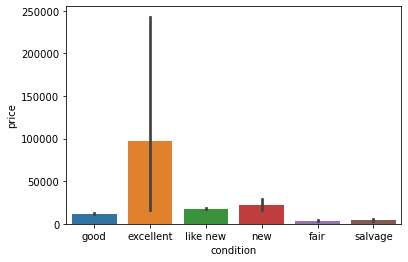

In [103]:
sns.barplot(x="condition",y="price",data=df,dodge=True)

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text major ticklabel objects>)

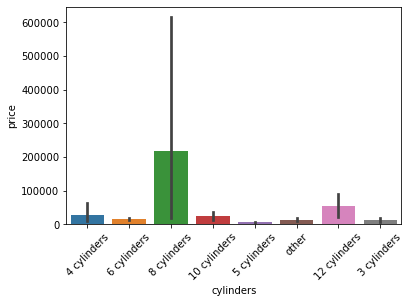

In [109]:
sns.barplot(x="cylinders",y="price",data=df)
plt.xticks(rotation=45)

In [132]:
for i in range(len(categorical_features)):
    vehicles_graph = round(df[['price', categorical_features[i]]].groupby(by = categorical_features[i]).mean(),2).reset_index()
    print(vehicles_graph)
    

       manufacturer       price
0             acura    11786.62
1        alfa-romeo    24686.08
2              audi    16273.93
3               bmw    14982.62
4             buick    11330.36
5          cadillac    15784.94
6         chevrolet    15840.61
7          chrysler    10350.76
8            datsun     9246.33
9             dodge    14060.83
10          ferrari   111637.25
11             fiat     8833.73
12             ford    17009.10
13              gmc    20142.78
14  harley-davidson     9012.00
15            honda    10934.03
16          hyundai    10906.47
17         infiniti    15514.36
18           jaguar    17314.74
19             jeep    30012.97
20              kia    11333.71
21       land rover     2800.00
22            lexus    14379.91
23          lincoln    13805.56
24            mazda     9668.95
25    mercedes-benz    18111.00
26          mercury     6059.46
27             mini    12546.88
28       mitsubishi    11546.93
29           nissan   125686.32
30      

       manufacturer       price
0             acura    11786.62
1        alfa-romeo    24686.08
2              audi    16273.93
3               bmw    14982.62
4             buick    11330.36
5          cadillac    15784.94
6         chevrolet    15840.61
7          chrysler    10350.76
8            datsun     9246.33
9             dodge    14060.83
10          ferrari   111637.25
11             fiat     8833.73
12             ford    17009.10
13              gmc    20142.78
14  harley-davidson     9012.00
15            honda    10934.03
16          hyundai    10906.47
17         infiniti    15514.36
18           jaguar    17314.74
19             jeep    30012.97
20              kia    11333.71
21       land rover     2800.00
22            lexus    14379.91
23          lincoln    13805.56
24            mazda     9668.95
25    mercedes-benz    18111.00
26          mercury     6059.46
27             mini    12546.88
28       mitsubishi    11546.93
29           nissan   125686.32
30      

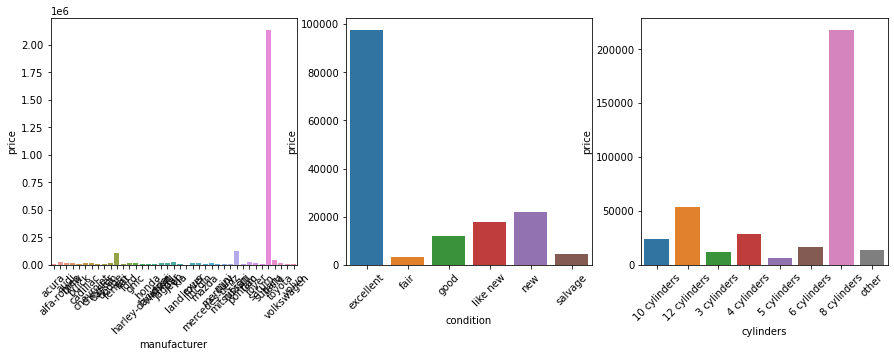

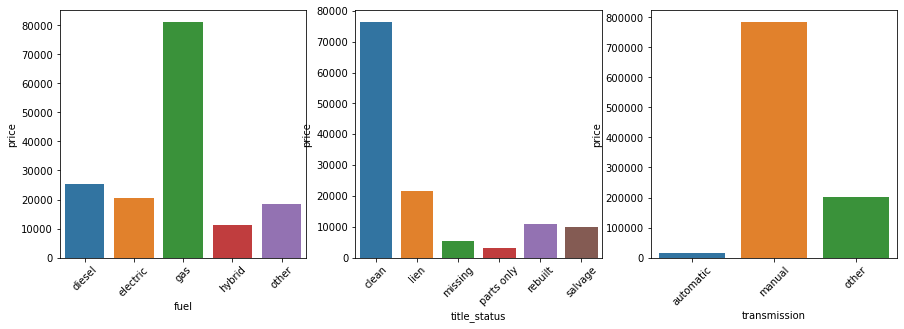

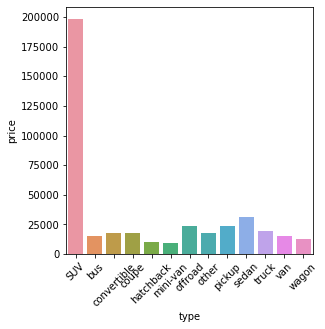

In [131]:

categorical_features = ['manufacturer', 'condition', 'cylinders', 'fuel',
                        'title_status', 'transmission', 'type']
ix = 1
fig = plt.figure(figsize = (15,10))

for i in range(len(categorical_features)):
    if ix <= 3:
        ax1 = fig.add_subplot(2,3,ix)
        vehicles_graph = round(df[['price', categorical_features[i]]].groupby(by = categorical_features[i]).mean(),2).reset_index()
        #print(vehicles_graph)
        sns.barplot(x=categorical_features[i],y="price",data=vehicles_graph)
        plt.xticks(rotation=45)
        
    ix = ix +1
    if ix == 4: 
        fig = plt.figure(figsize = (15,10))
        ix =1

    
        
            

- the above graphs shows the average price, based on each categorical variable
- **manufacturer:** the average price for "subaru" is highest, and lowest average priced used cars are of "land_rover"
- **condition:**  the average price for "excellent" condition is highest, and lowest average priced used cars are of "fair" condition.
- **cylinders:**  the average price for cars with "8 cylinders" is highest,follwed by "12 cylinders" and lowest average priced used cars consists "5 cylinders"
- **fuel**:the average price for cars with "gas" fuel is highest,follwed by "diesel" and cars with lowest average price are of "hybrid" type
- **title_status** : the average price for cars with "clean" status is highest,followed by "lien" and cars with lowest average price are of "parts only" status
- **transmission**:the average price for cars with "manual" is highest,followed by "other" and cars with lowest average price are of "automatic" status
- **type**:the average price for "SUV" type cars " is highest,followed by "sedanr" and cars with lowest average price are of "hatchback" status


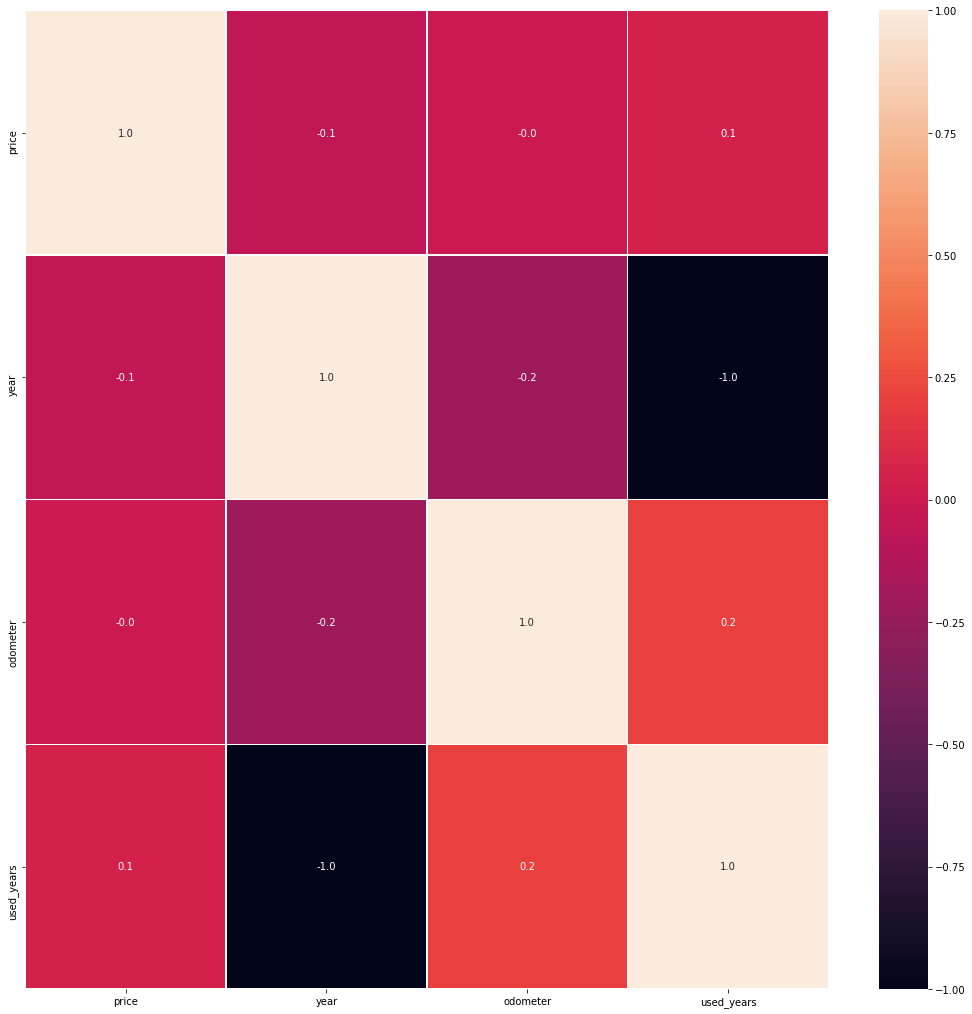

In [135]:
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

- price is highly correlated with "used_years"